## ASHW2

In [3]:
import numpy as np
from scipy import stats
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import t as student_t
from matplotlib import pyplot as plt
import pylab as plb
from astropy.stats import median_absolute_deviation
from astroML import stats as astroMLstats
from astropy.io import fits

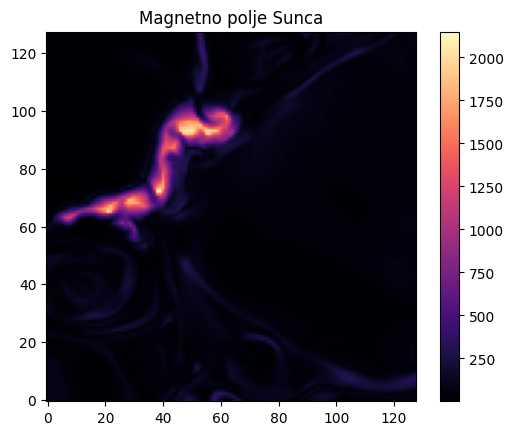

In [8]:
sunce = fits.open("magnetic_field_sun.fits")
podaci = sunce[0].data
plt.title('Magnetno polje Sunca')
plt.imshow(podaci,cmap = 'magma', origin = 'lower')
plt.colorbar()
plt.savefig('magnetno_polje.jpg')
plt.show()

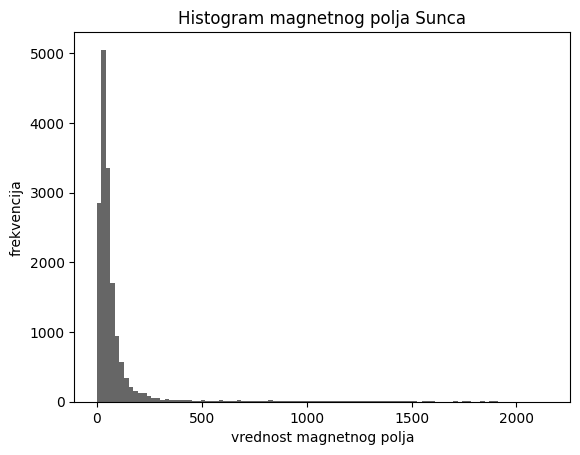

In [34]:
plt.hist(podaci.flatten(),bins=100,color = 'black',alpha = 0.6)
#plt.hist(data.ravel(order='F'),bins=100,color = 'black',alpha = 0.4)
plt.xlabel('vrednost magnetnog polja')
plt.ylabel('frekvencija')
plt.title('Histogram magnetnog polja Sunca')
plt.show()

In [12]:
# Израчунати средњу вриjедност, стандардну девиjациjу, медиjану, искошеност и
# зашиљеност (за расподjелу коjа прати таj хистограм)
podaci1 = podaci.flatten()

srednja_vrednost = np.mean(podaci1) 
medijana = np.median(podaci1)
varijansa = np.var(podaci1)
std_devijacija = np.std(podaci1)
iskosenost = stats.skew(podaci1)
zasiljenost = stats.kurtosis(podaci1)
print("srednja vrednost = ", srednja_vrednost)
print("medijana = ", medijana)
print("varijansa = ", varijansa)
print('standardna devijacija = ', std_devijacija)
print('iskosenost', iskosenost)
print('zasiljenost = ', zasiljenost)

srednja vrednost =  96.68127
medijana =  45.426666
varijansa =  42036.73
standardna devijacija =  205.02861
iskosenost 5.489817987627117
zasiljenost =  34.22490693608943


sigma =  205.02861
mu =  96.68127


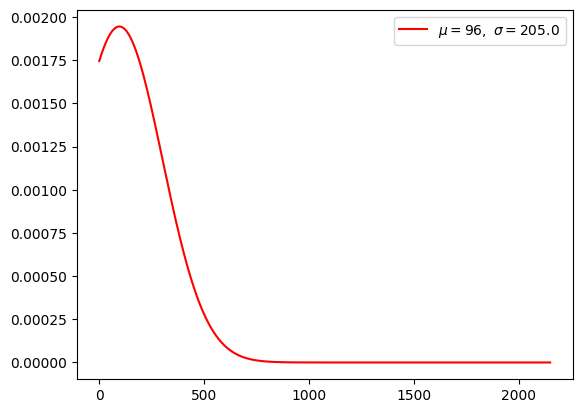

In [38]:
# Упоредити хистограм са гаусиjаном
#x = np.linspace(-10, 10, 1000)

x_vred = np.linspace(min(podaci1), max(podaci1), 1000)

mu = srednja_vrednost
sigma = std_devijacija
gaus = norm.pdf(x_vred, mu, sigma)
#ne kontam
print('sigma = ',std_devijacija)
print('mu = ',srednja_vrednost)

#plt.hist(podaci1,bins=100,color = 'black',alpha = 0.4,edgecolor='black')
plt.plot(x_vred,gaus, c='red',label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))
plt.legend()
plt.show()

In [40]:
apsolutne_vrednosti = np.abs(podaci1)
prag = np.percentile(apsolutne_vrednosti,90)
podaci_top10 = podaci1[apsolutne_vrednosti >= prag]

print(len(podaci_top10))
print(prag)
print("------")
sr_vr_top10 = np.mean(podaci_top10)
medijana_top10 = np.median(podaci_top10)
std_dev_top10 = np.std(podaci_top10)

print(sr_vr_top10)
print(medijana_top10)
print(std_dev_top10)

1639
148.4297836303711
------
527.90063
296.47406
453.18808


In [20]:
from tabulate import tabulate

data = [
    ["srednja vrednost", srednja_vrednost, sr_vr_top10],
    ["medijana", medijana, medijana_top10],
    ["standardna devijacija", std_devijacija, std_dev_top10],
]
headers = ["statistika", "svi podaci","top 10% podataka"]

table = tabulate(data, headers=headers, tablefmt="grid")
print(table)

+-----------------------+--------------+--------------------+
| statistika            |   svi podaci |   top 10% podataka |
+=======================+==============+====================+
| srednja vrednost      |      96.6813 |            527.901 |
+-----------------------+--------------+--------------------+
| medijana              |      45.4267 |            296.474 |
+-----------------------+--------------+--------------------+
| standardna devijacija |     205.029  |            453.188 |
+-----------------------+--------------+--------------------+


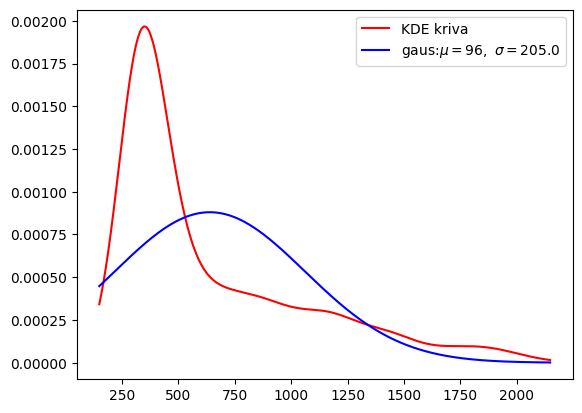

In [48]:
x_vred10 = np.linspace(min(podaci_top10), max(podaci_top10), 1000)

mu_top10 = sr_vr_top10
sigma_top10 = std_dev_top10
gaus_top10 = norm.pdf(x_vred, mu_top10, sigma_top10)

from scipy.stats import gaussian_kde
kde = gaussian_kde(podaci_top10)
plt.plot(x_vred10, kde(x_vred), 'r-', label="KDE kriva")
#plt.hist(podaci_top10,bins=100,color = 'black',alpha = 0.4,edgecolor='black')
plt.plot(x_vred10,gaus_top10, c='blue',label='gaus:'r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))
plt.legend()
plt.show()

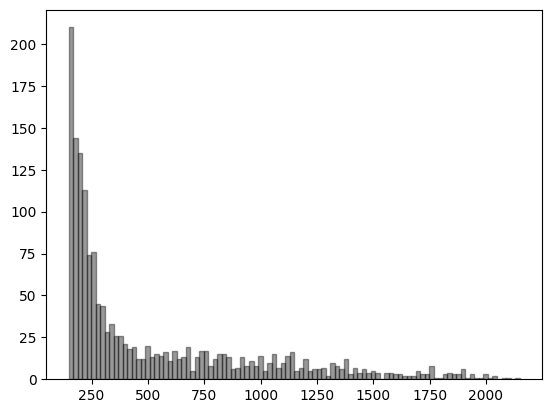

In [46]:
plt.hist(podaci_top10,bins=100,color = 'black',alpha = 0.4,edgecolor='black')
plt.show()

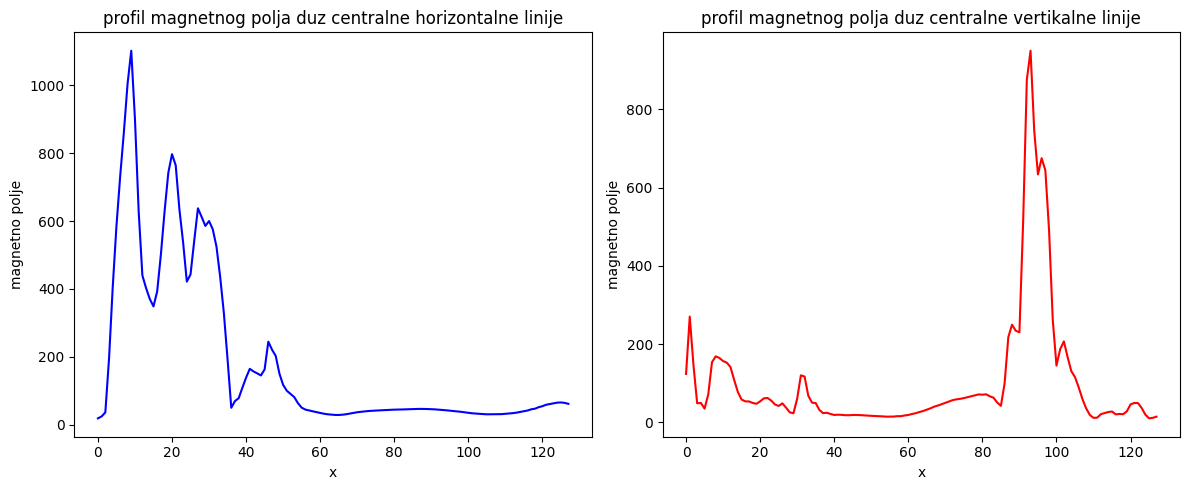

In [24]:
dimy,dimx = podaci.shape
#centralne linije
centar_x = dimx//2
centar_y = dimy//2 

horizontalni_profil = podaci[centar_y, :]
vertikalni_profil = podaci[:, centar_x]

fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].plot(horizontalni_profil, color = 'blue')
ax[0].set_title('profil magnetnog polja duz centralne horizontalne linije')
ax[0].set_xlabel('x')
ax[0].set_ylabel('magnetno polje')

ax[1].plot(vertikalni_profil, color = 'red')
ax[1].set_title('profil magnetnog polja duz centralne vertikalne linije')
ax[1].set_xlabel('x')
ax[1].set_ylabel('magnetno polje')

plt.tight_layout()
plt.show()

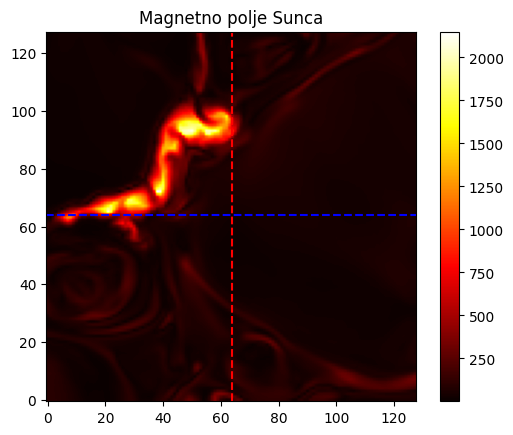

In [28]:
plt.title('Magnetno polje Sunca')
plt.imshow(podaci,cmap = 'hot', origin = 'lower')
plt.axhline(centar_y, color='blue', linestyle='--', linewidth=1.5, label="Centralna horizontalna linija")
plt.axvline(centar_x, color='red', linestyle='--', linewidth=1.5, label="Centralna vertikalna linija")
plt.colorbar()
plt.savefig('magnetno_polje.jpg')
plt.show()